<h1> Music genre prediction [M1_27DS+] </h1>  
<style>
h1 {
  border: dashed white;
  padding: 10px 12px;
  background-color: indigo;
  position: static;
}
</style>

## Table of contents
* [1. Описание проекта. Подготовка к работе.](#chapter1)
    * [1.1 Загрузка данных и библиотек](#section1_1)
    * [1.2 Настройка окружения](#section1_2)
    * [1.3 Инициализация и описание функций](#section1_3)
* [2. Предобработка данных](#chapter2)
    * [2.1 Дубликаты и пропуски](#section_2_1)
* [3. Исследовательский анализ данных](#chapter3)
    * [3.1 Столбец acousticness](#section3_1)
    * [3.2 Столбец duration_ms](#section3_2)
    * [3.3 Столбец energy](#section3_3)
    * [3.4 Столбец instrumentalness](#section3_4)
    * [3.5 Столбец liveness](#section3_5)
    * [3.6 Столбец loudness](#section3_6)
    * [3.7 Столбец speechiness](#section3_7)
    * [3.8 Столбец tempo](#section3_8)
    * [3.9 Столбец valence](#section3_9)
    * [3.10 Столбец popularity](#section3_10)

* [4. ](#chapter4)
* [5. Общий вывод](#chapter5)
* [Чеклист](#chapter_checklist)

In [1]:
### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="chapter1.1"></a>

#### Section 1.2 <a class="anchor" id="chapter1.2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

## 1. Описание проекта. Подготовка к работе. <a class="anchor" id="chapter1"></a>
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". \
Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. \
Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. \
### Задача:
Разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### План работы:
1. Загрузка данных, настройка среды и функций;
2. Предобработка;
3. Исследовательский анализ данных;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков.

### Данные
* **train.csv** - информация (40000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* **test.csv** - информация (10000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* **sample_submit.csv** - файл предсказаний в правильном формате.


#### Описание полей данных
* `instance_id` -Уникальный идентификатор трека
* `track_name` - Название трека
* `popularity` - Популярность трека
* `acousticness` - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* `danceability` - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* `duration_ms` - Продолжительность трека в миллисекундах.
* `energy` - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* `instrumentalness` - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* `key` - базовый ключ (нота) произведения
* `liveness` - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* `loudness` - Общая громкость трека в децибелах (дБ)
* `mode` - Указывает на модальность (мажорную или минорную) трека
* speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* `tempo` - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* `obtained_date` - дата загрузки в сервис
* `valence` - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* `music_genre` - Музыкальный жанр трека. Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Загрузка библиотек <a class="anchor" id="section1_1"></a>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display

### Настройка окружения 

In [3]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

### Инициализация функций

In [4]:
# функция информации по таблице
def dataframe_summary(df, string):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    # Вывод статистического описания
    print("\n Статистическое описание:")
    display(df.describe().transpose())

    # Вывод случайных примеров
    print("\nСлучайные примеры:")
    display(df.sample(5))

    # Вывод количества строк и столбцов
    print("\nКоличество строк и столбцов:", df.shape)
    
    # Вывод количества явных дубликатов
    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    print('')

In [5]:
# функция поиска пропусков
def analyze_missing_values(dataframes, names):
    for i, df in enumerate(dataframes):
        # Подсчет количества и процента пропущенных значений
        total = df.isnull().sum().sort_values(ascending=False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data.query('Total > 0')

        # Вывод информации о пропусках
        print(f"Пропуски в датафрейме {names[i]}:\n{missing_data}\n")

        # Создание и отображение тепловой карты
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f"Heatmap пропусков для {names[i]}")
        plt.show()

### Загрузка данных 

In [6]:
file_names = {
    'train': 'train.csv',
    'test': 'test.csv',
    'train_ad': 'train_addition.csv'
}

# Загрузка каждого файла в соответствующую переменную
for variable, file_name in file_names.items():
    globals()[variable] = pd.read_csv(file_name)

file_names = list(file_names.keys())

In [40]:
train = train
test = test
train_ad = train_ad
dataframes = [train , test]
# Размер до удаления данных в train
initial_size = train.shape[0]

In [8]:
for item in range(len(file_names)):
    print(f'Размер таблицы {file_names[item], globals()[file_names[item]].shape}')
    print(f'Пропусков {globals()[file_names[item]].isnull().any(axis=1).sum()}')

Размер таблицы ('train', (40000, 17))
Пропусков 20609
Размер таблицы ('test', (10000, 16))
Пропусков 5122
Размер таблицы ('train_ad', (20394, 16))
Пропусков 1640


In [9]:
dataframe_summary(train, 'train')
dataframe_summary(test, 'test')

Общая информация по таблице: train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music

,count,mean,std,min,25%,50%,75%,max
instance_id,"40,000.00","25,959.01","14,443.71","1,000.00","13,414.75","25,949.50","38,496.25","50,999.00"
popularity,"36,078.00",44.18,15.55,0.00,34.00,45.00,56.00,99.00
acousticness,"40,000.00",0.31,0.34,0.00,0.02,0.14,0.55,1.00
danceability,"37,963.00",0.56,0.18,0.06,0.44,0.57,0.69,0.98
duration_ms,"40,000.00","221,322.07","129,736.74",-1.00,"174,849.75","219,320.00","268,667.00","4,830,606.00"
energy,"40,000.00",0.60,0.27,0.00,0.43,0.64,0.81,1.00
instrumentalness,"40,000.00",0.18,0.33,0.00,0.00,0.00,0.16,0.99
liveness,"40,000.00",0.19,0.16,0.01,0.10,0.13,0.24,1.00
loudness,"40,000.00",-11.68,14.43,-110.95,-11.62,-7.48,-5.26,3.74
speechiness,"40,000.00",0.13,0.21,0.02,0.04,0.05,0.11,1.82



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
24188,36609,NaN,49.00,0.70,0.42,"350,333.00",0.33,0.91,F#,0.12,-14.82,Minor,0.03,142.026,4-Apr,0.04,Rock
28787,30738,Touch Eem Body,70.00,0.57,0.73,"187,907.00",0.42,0.00,B,0.38,-11.89,Minor,0.25,129.786,NaN,0.06,Rap
9456,39588,NaN,54.00,0.00,0.42,"256,333.00",0.71,0.00,A,0.40,-3.55,Major,0.04,?,4-Apr,0.29,Rock
16598,21773,Roots - Radio Version,45.00,0.26,0.83,"216,856.00",0.67,0.00,B,0.11,-3.40,Major,0.04,114.977,4-Apr,0.51,Country
24919,23950,Someday Girl,38.00,0.03,0.48,"220,384.00",0.83,0.00,C#,0.11,-5.05,Major,0.10,151.02700000000002,NaN,0.66,Country



Количество строк и столбцов: (40000, 17)

Количество явных дубликатов: 0

Общая информация по таблице: test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7388 non-null   object 
 2   popularity        8987 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9477 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9673 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9518 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8419 non

,count,mean,std,min,25%,50%,75%,max
instance_id,"10,000.00","26,161.46","14,394.19","1,008.00","13,839.75","26,174.00","38,503.50","50,993.00"
popularity,"8,987.00",44.39,15.53,0.00,34.00,45.00,56.00,90.00
acousticness,"10,000.00",0.30,0.34,0.00,0.02,0.14,0.54,1.00
danceability,"9,477.00",0.56,0.18,0.06,0.45,0.57,0.69,0.99
duration_ms,"10,000.00","220,974.73","124,327.61",-1.00,"174,620.75","219,213.00","268,294.50","2,764,934.00"
energy,"10,000.00",0.60,0.26,0.00,0.44,0.65,0.82,1.00
instrumentalness,"10,000.00",0.18,0.32,0.00,0.00,0.00,0.14,1.00
liveness,"10,000.00",0.20,0.16,0.02,0.10,0.13,0.25,0.99
loudness,"10,000.00",-11.54,14.42,-102.97,-11.28,-7.37,-5.20,1.89
speechiness,"10,000.00",0.13,0.21,0.02,0.04,0.05,0.12,1.65



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
4115,17213,NaN,55.00,0.00,0.52,-1.00,0.86,0.00,G#,0.07,-3.85,Major,0.03,?,4-Apr,0.54
3008,15797,Quand Tu Dors Pres De Moi,NaN,0.95,0.46,"266,173.00",0.20,0.01,G,0.12,-14.95,Major,0.04,141.659,5-Apr,0.25
7067,50810,Old Friends x New Foes,53.00,0.37,NaN,"207,240.00",0.51,0.00,NaN,0.16,-11.05,Minor,0.85,77.274,4-Apr,0.26
9883,4729,NaN,29.00,0.03,0.82,"288,693.00",0.87,0.62,A#,0.06,-2.77,NaN,0.05,?,4-Apr,0.78
2512,37945,Dreams I'll Never See,48.00,0.16,0.64,"426,000.00",0.58,0.18,G,0.13,-13.01,NaN,0.03,105.87700000000001,4-Apr,0.62



Количество строк и столбцов: (10000, 16)

Количество явных дубликатов: 0



* В обоих таблицах по 16 колонок с features-признаками;
* В таблице train также присутсвует 17ая колонка с target-признаком;
* В данных присутсвуют пропуски. В таблице train больше всего строчек с пропусками, подробнее обработаем пропуски далее;
* В данных присутсвуют аномалии, например, `duration_ms` может принимать значение *-1*, запомним это;
* Не везде правильный тип данных, например, `obtained_date` относится к дате, но формат таковой не имеет, а `duration_ms` имеет тип **float** вместо **int**;
* Также из-за пропусков целочисленная переменная `popularity` имеет тип **float** вместо **int**;
* Возможно, присутвуют дубликаты в данных, необходимо проверить без колонок 	`instance_id` и	`track_name`.

## 2. Предобработка данных <a class="anchor" id="chapter2"></a>

### Пропуски

Пропуски в датафрейме train:
               Total  Percent
track_name     10738    26.85
obtained_date   6219    15.55
popularity      3922     9.80
danceability    2037     5.09
mode            1853     4.63
key             1423     3.56



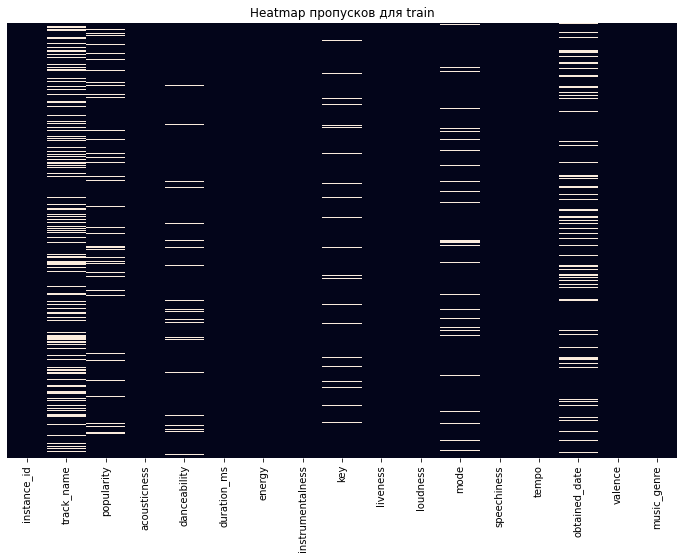

Пропуски в датафрейме test:
               Total  Percent
track_name      2612    26.12
obtained_date   1581    15.81
popularity      1013    10.13
danceability     523     5.23
mode             482     4.82
key              327     3.27



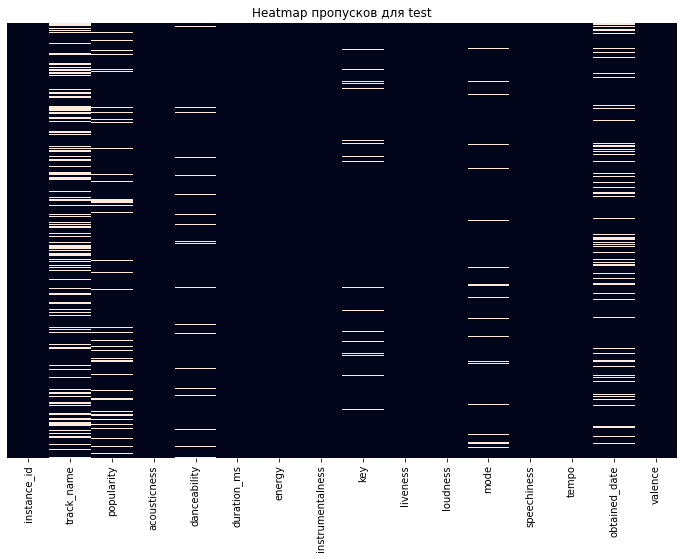

In [10]:
analyze_missing_values(dataframes, ['train', 'test'])

* Несмотря на большое наличие пропусков, данные отсутсвуют лишь в 6 столбцах: `track_name`, `obtained_date`, `popularity`, `danceability`, `mode`, `key`;
* Больше всего пропусков в столбцах `track_name` и `obtained_date` от 15% до 26% от общего кол-ва строк;
* У меня есть предположение, что пропуски могут быть связаны. Думаю, что треки имеющие пропуск в одной переменной, скорее всего имеют другие параметры не заполнеными;
* Построим матрицу корреляции пропусков.

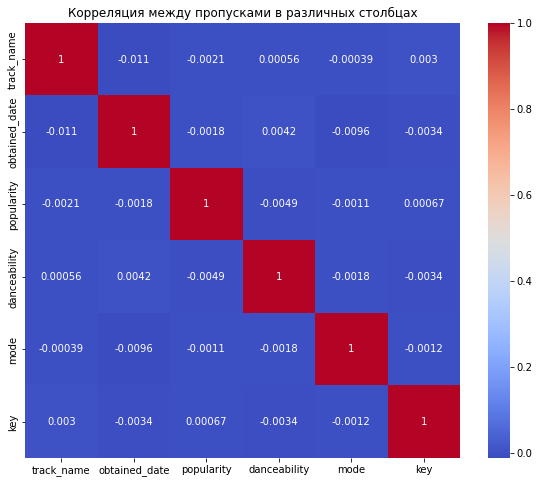

In [11]:
# Создание булевой матрицы пропусков
missing_bool = train[['track_name', 'obtained_date', 'popularity', 'danceability', 'mode', 'key']].isnull()

# Вычисление корреляции между столбцами булевой матрицы
corr = missing_bool.corr(method='pearson')  # Или использовать другой метод корреляции

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляция между пропусками в различных столбцах')
plt.show()

* Корреляции между пропусками, к сожалению или к счастью, не наблюдается.
* Поэтапно обработаем пропуски.

#### Пропуски в `popularity`, `danceability`, `mode`, `key`

Столбец `popularity` имеет **9.80%** пропусков от общего числа данных. Это достаточно много, поэтому перед удалением, проверим, можно ли заполнить пропуски.

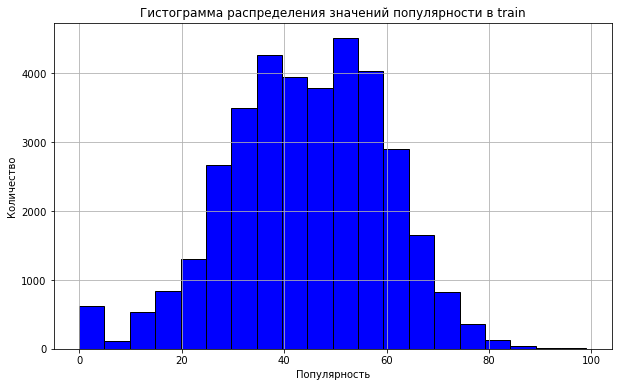

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(train['popularity'], bins=20, color='blue', edgecolor='black')
plt.title('Гистограмма распределения значений популярности в train')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

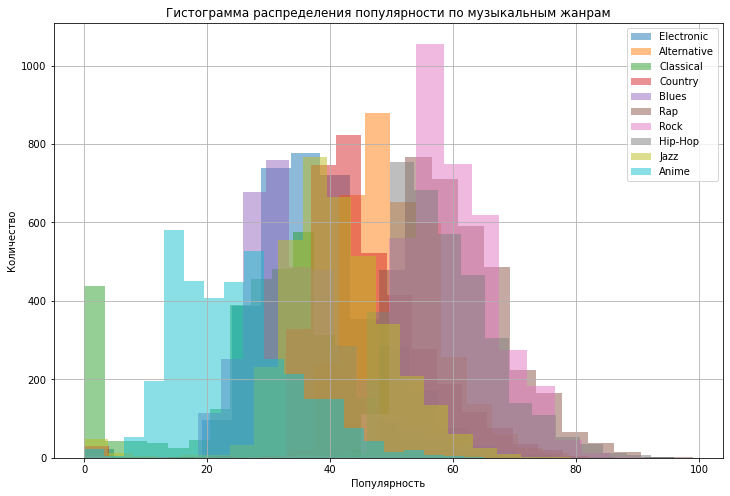

In [17]:
# Уникальные жанры
genres = train['music_genre'].unique()

# Гистограмма для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Наблюдается зависимость популярности от жанра музыки. Центр распределения каждой гистограммы смещен вправо или влево по шкале популярности. Таким образом, пропуски в столбце `popularity` можно заполнить на основе среднего значения популярности для каждого жанра.

In [39]:
# Вычисление медианы популярности для каждого жанра
median_popularity_per_genre = train.groupby('music_genre')['popularity'].median()
mean_popularity_per_genre = round(train.groupby('music_genre')['popularity'].mean(), 0)

# Заполнение пропусков в 'popularity' медианными значениями соответствующих жанров
for genre in median_popularity_per_genre.index:
    train.loc[(train['music_genre'] == genre) & (train['popularity'].isnull()), 'popularity'] = median_popularity_per_genre[genre]

# Проверка, что пропуски были заполнены
print(f'Пропусков в столбце popularity {train["popularity"].isnull().sum()}')

Пропусков в столбце popularity 0


Посмотрим на распределение популярности жанров после заполнения пропусков.

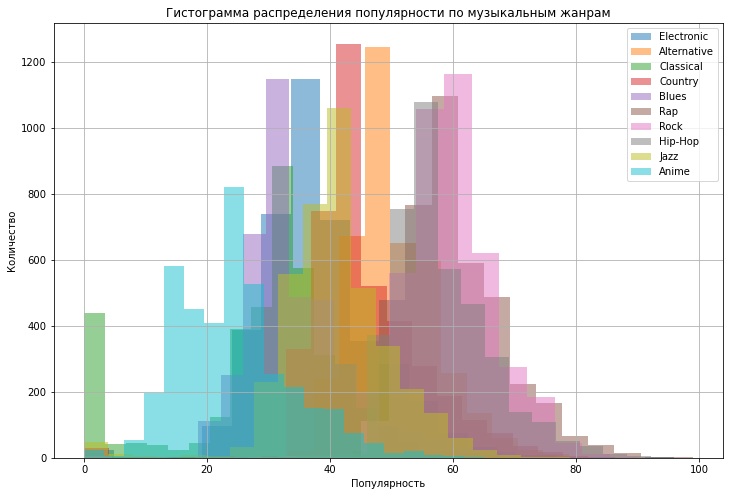

In [35]:
genres = train['music_genre'].unique()    
# Создание гистограмм для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Очевидно, что выросли пики связанные с медианным значением каждого жанра. В принципе, можно считать заполнение пропусков удачным в данном случае.


Пропусков `danceability`, `mode`, `key` очень мало, поэтому, думаю можно смело избавиться от пропусков в этих столбцах.

In [41]:
# Удаление строк
train_cleaned = train.dropna(subset=['danceability', 'mode', 'key'])

# Размер после удаления
final_size = train_cleaned.shape[0]

# Расчет и вывод потерь в процентах
loss_percent = ((initial_size - final_size) / initial_size) * 100

print(f"Размер до: {initial_size}")
print(f"Размер после: {final_size}")
print(f"Потеряно данных: {loss_percent:.2f}%")

Размер до: 40000
Размер после: 34908
Потеряно данных: 12.73%


#### Пропуски в `track_name` и `obtained_date`

In [12]:
print(f'Кол-во уникальных названий треков в таблице train {len(train.track_name.unique())}')
print(f'Кол-во уникальных названий треков в таблице test {len(test.track_name.unique())}')

Кол-во уникальных названий треков в таблице train 26019
Кол-во уникальных названий треков в таблице test 7124


In [13]:
print(f'Уникальные даты загрузки треков в таблице train {train.obtained_date.unique()}')
print(f'Уникальные даты загрузки треков в таблице test {test.obtained_date.unique()}')

Уникальные даты загрузки треков в таблице train ['4-Apr' nan '5-Apr' '3-Apr' '1-Apr' '0/4']
Уникальные даты загрузки треков в таблице test ['4-Apr' '3-Apr' nan '5-Apr' '1-Apr']


* Оставим пропуски в этих переменных, тк они не пригодятся нам для анализа.
  * `track_name` уникальна, у нее отсутсвует обобщаемость (как и у `instance_id`), которая могла бы помочь в предсказании жанра;
  * `obtainde_date` может не иметь прямого влияния на жанр трека. Так, у нас присутсвуют данные только за арпель, поэтому если в новых данных будут другие даты, модель не сможет правильно экстраполировать полученный результат.

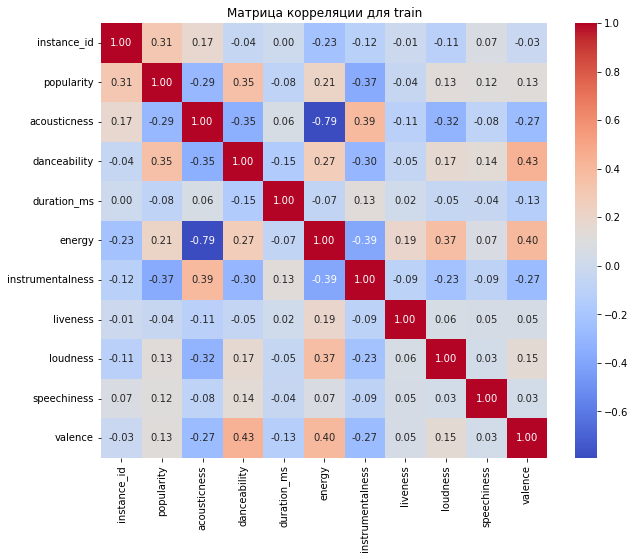

In [14]:
corr_matrix_train = train.corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для train")
plt.show()


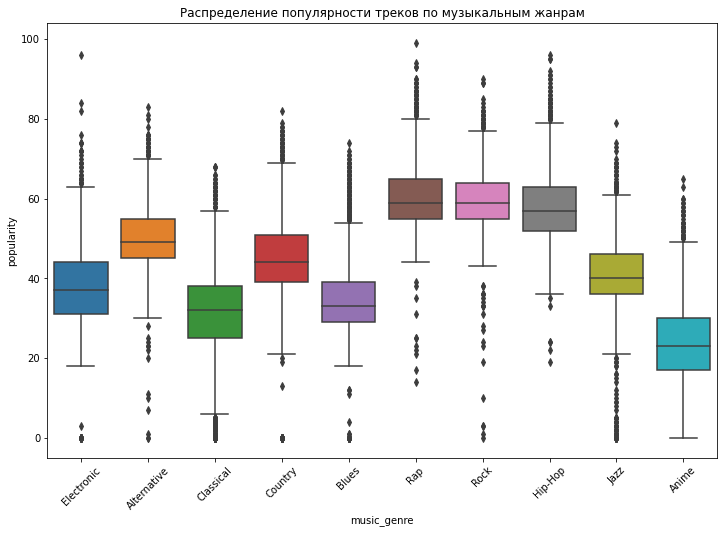

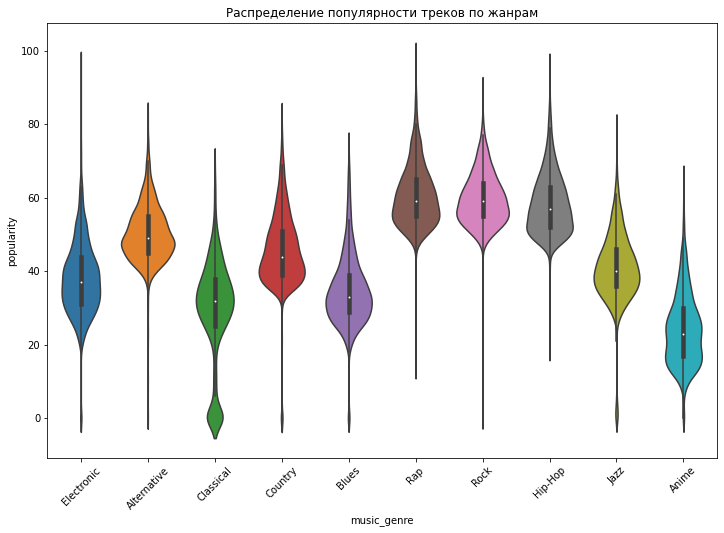

In [15]:
# Удаление строк с пропусками в столбце 'popularity'
train_clean = train.dropna(subset=['popularity'])

# Создание boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по музыкальным жанрам')
plt.show()

# Или создание violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='music_genre', y='popularity', data=train_clean)
plt.xticks(rotation=45)
plt.title('Распределение популярности треков по жанрам')
plt.show()